# Challenge: Sentiment Analysis wiht Naive Bayes

Perform a sentiment analysis, classifying wether feedback left on a website is either positive or negative.  Using data from the Sentiment Labelled Sentences Data Set: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences, which was created for the paper _From Group to Individual Labels using Deep Features_ Kotzia et.al., KDD 2015.  

Pick one of the company data files and build a classifier.  When satisified, test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process.

### UCI Machine Learning Repository, Center for machine Learning and Intelligent Systems
#### Sentiment Labelled Sentences Data Set 

<table>
    <tr>
        <td>Data Set Characteristics:  </td>
        <td>Text</td>
    </tr>
    <tr>
        <td>Number of Instances:  </td>
        <td>3000</td>
    </tr>
</table>

#### Data Set Information
- Sentence Score: Score is either 1 (for positive) or 0 (for negative)
- The sentences come from three different websites: imdb.com, amazon.com, and yelp.com
- For each website there exist 500 positive and 500 negative sentences.  Those were selected randomly for larger datasets of reviews.
- The attributes are text sentences, extracted from reviews of products, movies, and restaurants.

In [1]:
import scipy
import sklearn
import string

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB

plt.style.use("default")
sns.set(style="whitegrid")

In [141]:
# Load the data from imdb_labelled.txt into a pandas dataframe
file_path = "sentiment labelled sentences\imdb_labelled.txt"

imdb_raw = pd.read_csv(file_path, delimiter="\t", header=None)
imdb_raw.columns = ["reviews","sentiment_score"]

imdb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
reviews            748 non-null object
sentiment_score    748 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [142]:
# Select dataframe rows labeled as positive reviews
positive_reviews = imdb_raw[(imdb_raw["sentiment_score"]==1)]

# List of words to disregard from consideration for the filter
stopwords = ['the', 'and', 'a', 'of', 'is', 'i', 'this', 'to', 'in', 'it', 'was', 'that']

# List of unique words from the reviews column
unique_words = pd.Series(" ".join(positive_reviews["reviews"]).lower().split()).unique().tolist()

# Remove puncuation attached to any words in the list
unique_words = [x.strip(string.punctuation) for x in unique_words]

# Filter out the stopwords from the unique words list
unique_words = list(filter(lambda x: x not in stopwords, unique_words))

In [143]:
# Take a look at the remaining words to generate ideas for keywords to pass to the classifier
unique_words

['best',
 'scene',
 'movie',
 'when',
 'gerardo',
 'trying',
 'find',
 'song',
 'keeps',
 'running',
 'through',
 'his',
 'head',
 'saw',
 'today',
 'thought',
 'good',
 'effort',
 'messages',
 'for',
 'kids',
 'loved',
 'casting',
 'jimmy',
 'buffet',
 'as',
 'science',
 'teacher',
 'those',
 'baby',
 'owls',
 'were',
 'adorable',
 'showed',
 'lot',
 'florida',
 'at',
 "it's",
 'best',
 'made',
 'look',
 'very',
 'appealing',
 'songs',
 'muppets',
 'so',
 'hilarious',
 'cool',
 'right',
 'on',
 'case',
 'delivers',
 'everything',
 'almost',
 'right',
 'your',
 'face',
 'review',
 'long',
 'overdue',
 'since',
 'consider',
 'tale',
 'two',
 'sisters',
 'be',
 'single',
 'greatest',
 'film',
 'ever',
 'made',
 "i'll",
 'put',
 'gem',
 'up',
 'against',
 'any',
 'terms',
 'screenplay',
 'cinematography',
 'acting',
 'post-production',
 'editing',
 'directing',
 'or',
 'other',
 'aspect',
 'film-making',
 'practically',
 'perfect',
 'all',
 'them',
 '\x96',
 'true',
 'masterpiece',
 'sea'

In [144]:
# Word and word combinations to look for in the data
keywords = ["best", "good", "loved", "very", "perfect", "greatest", "perfect", "10", "decent", "terrific", "fun", "beautiful"]

for key in set(keywords):
    imdb_raw[str(key)] = imdb_raw["reviews"].str.contains(" "+str(key)+" ", case=False)

# Convert the sentiment_score to boolean values
imdb_raw["sentiment_score"] = (imdb_raw["sentiment_score"]==1)

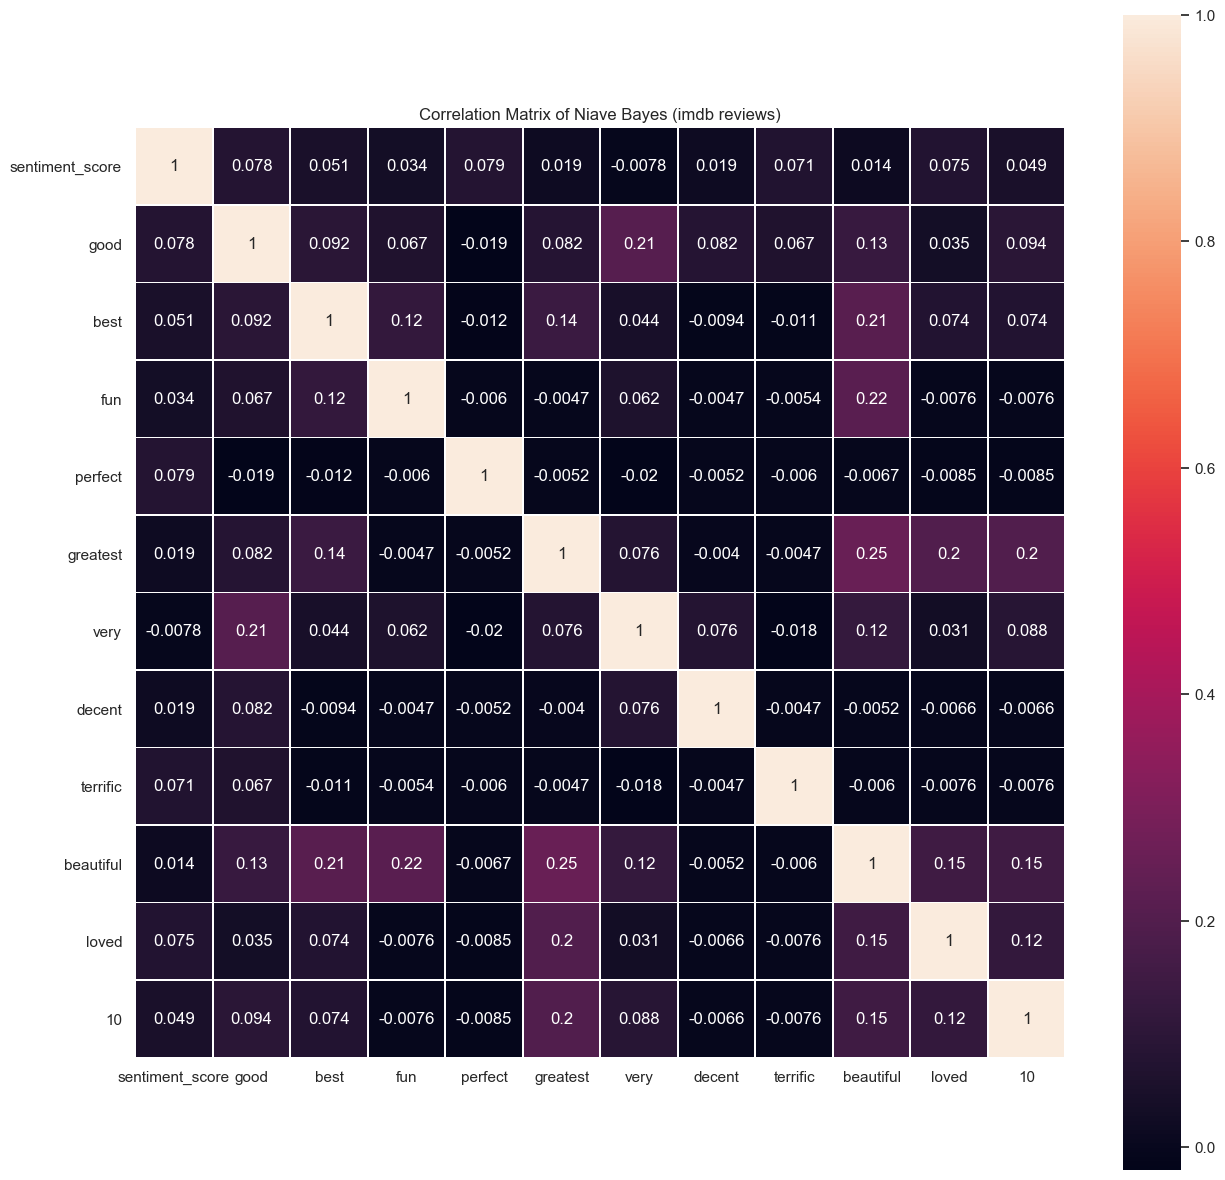

In [145]:

def corr_plot(corr_mat,figsize,title):
    """
        Pass in a correlation matrix and figsize (as a tuple) and plot the corresponding heatmap.
    """
    plt.figure(figsize=figsize)

    sns.heatmap(corr_mat, square=True, annot=True, linewidth=0.5)
    plt.title(title)

    # Fix display issues for this version of matplotlib
    b,t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b,t)
    # plt.yticks(rotation=360)

    plt.show();

# imdb_raw.dropna(axis=1,how="any",inplace=True)
corr_plot(corr_mat=imdb_raw.corr(),figsize=(15,15),title=f"Correlation Matrix of Niave Bayes (imdb reviews)")

In [108]:
# Now, load the yelp reviews and apply the same keywords
yelp_file = "sentiment labelled sentences\yelp_labelled.txt"

yelp_raw = pd.read_csv(yelp_file, delimiter="\t", header=None)
yelp_raw.columns = ["reviews","sentiment_score"]

yelp_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
reviews            1000 non-null object
sentiment_score    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


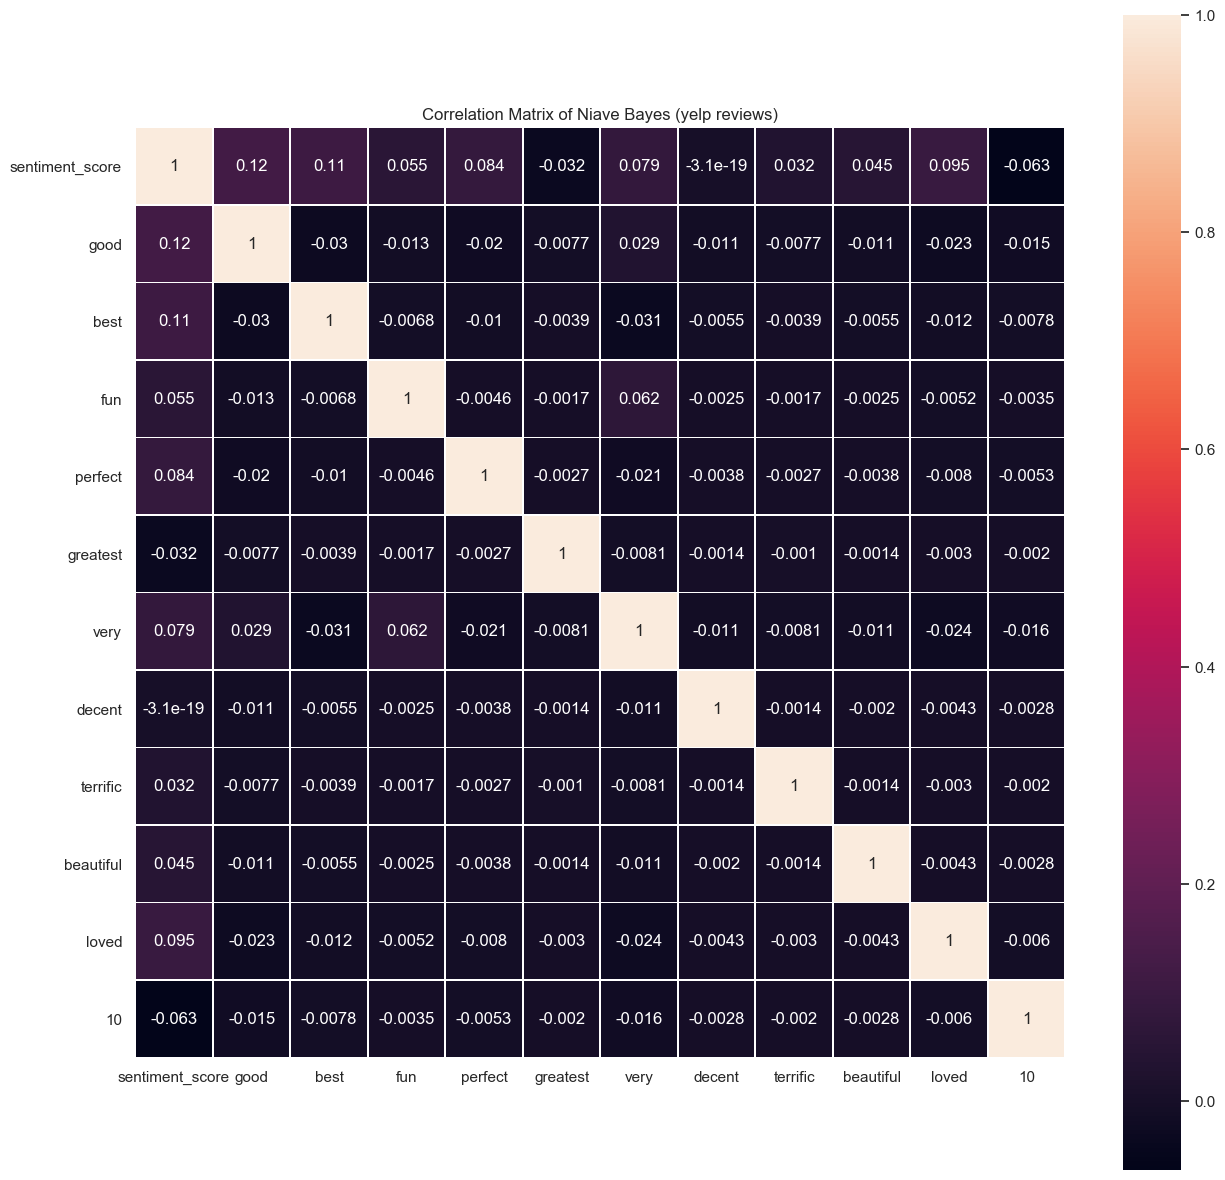

In [109]:
# Apply the keywords from the imdb model to yelp
for key in set(keywords):
    yelp_raw[str(key)] = yelp_raw["reviews"].str.contains(" "+str(key)+" ", case=False)

# Convert the sentiment_score to boolean values
yelp_raw["sentiment_score"] = (yelp_raw["sentiment_score"]==1)

# Display a correlaition plot based on the keywords applied to yelp data
corr_plot(corr_mat=yelp_raw.corr(),figsize=(15,15),title=f"Correlation Matrix of Niave Bayes (yelp reviews)")

In [117]:
data = yelp_raw[keywords] # x for BernoulliNP.fit()
target = yelp_raw["sentiment_score"] # y for BernoulliNP.fit() 

# Instantiate the model and store in a variable
bnb = BernoulliNB()

# Fit the model to the data
bnb.fit(data,target)

# Classify, storing the results in a variable
y_pred = bnb.predict(data)

# Print the results
print(f"Number of mislabeled points out of a total {data.shape[0]} points: {(target != y_pred).sum()}")

Number of mislabeled points out of a total 1000 points: 424


#### Feature Engineering
1. Create a list of keywords that can be used as features of the dataset.
    - Create a list of common words that you are not interested in cosidering (stopwords).
    - Create a list of unique words from the reviews variable to be considered as features.
    - Filter out stopwords from the list of conisderation words.
    - Review the list of consideration words for ideas to add to the keywords list.
#### Feature Correlation
2. Plot a correlation matrix to get a look at the independence of the newly created featured from one another.
    - This was an iterative process where the correlation plot influenced the elements in the keywords list.
    - When satisified with the length and contents of the keywords list I moved to the next phase.
#### Model Application
3.  I repeated steps 1 & 2 from above but this time using yelp data, also I did not add any new word elements to the keywords list.  Instead, several keywords were removed as they did not correlate to the yelp data.
    - I created an instance of the Bernoulli model using the yelp data.


# Discuss with mentor

What is happening with the correlation plot below?

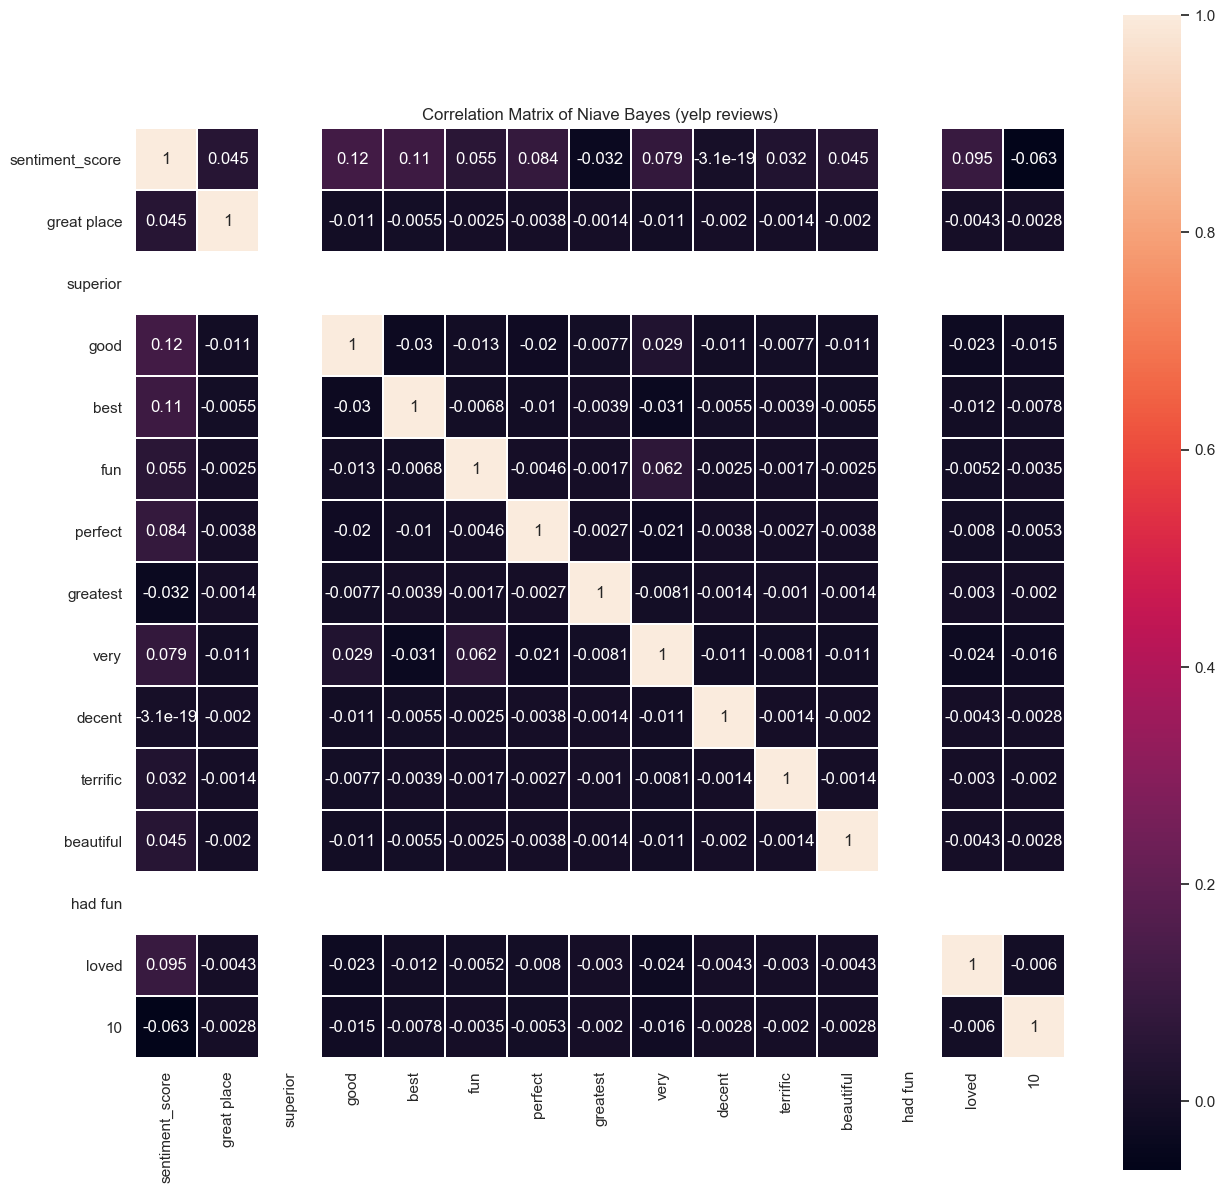

In [146]:
other_keywords = ["superior", "great place", "had fun"]

yelp_raw2 = pd.read_csv(yelp_file, delimiter="\t", header=None)
yelp_raw2.columns = ["reviews","sentiment_score"]

keywords2 = keywords+other_keywords

for key in set(keywords2):
    yelp_raw2[str(key)] = yelp_raw2["reviews"].str.contains(" "+str(key)+" ", case=False)

# Convert the sentiment_score to boolean values
yelp_raw2["sentiment_score"] = (yelp_raw2["sentiment_score"]==1)

# Display a correlaition plot based on the keywords applied to yelp data
corr_plot(corr_mat=yelp_raw2.corr(),figsize=(15,15),title=f"Correlation Matrix of Niave Bayes (yelp reviews)")